# Predicting bankruptcy
<i> Rémi Bardenet (CNRS & CRIStAL, Univ. Lille, [website](http://rbardenet.github.io)) and Eric Séverin (LEM, Univ. Lille). </i> 

We use a RAMP template of the [Paris-Saclay Center for Data Science](http://www.datascience-paris-saclay.fr/en).

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# next line is optional, seaborn makes plots more beautiful, but 
# everythingin this notebook should work using only matplotlib
import seaborn as sns; sns.set()

## Fetch the data and load it in pandas

In [3]:
data2002 = pd.read_excel("../Data/2002_BASE EN ORDRE.xls")
data2002["year"] = 2002
data2003 = pd.read_excel("../Data/2003_BASE EN ORDRE.xls")
data2003["year"] = 2003
data = pd.concat([data2002,data2003], ignore_index=True)
data.loc[data["Bankrupt"]==2, "Bankrupt"] = 0 # Change label 2 for zero

In [4]:
data.describe()

,Bankrupt,RE1,RE2,RE3,RE4,RE5,RE6,EF1,EF2,EF3,EF4,EF5,EF7,EF8,PR1,PR2,SF1,SF2,SF7,SF8,SF10,SF11,LI1,LI2,LI3,LI4,LI5,LI6,LI7,LI8,LI9,LI10,LI11,LI12,RO1,RO2,RO3,RO4,RO5,RO6,AP1,AP2,year
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,0.500000,-1.354647,-0.281191,0.027173,0.131754,-0.017302,-0.038325,0.234672,10.923191,-0.003508,3.282544,0.257955,0.081919,0.031824,0.016365,0.212579,0.056234,0.360066,0.929037,-0.045194,0.208100,2.010596,0.138870,0.085360,0.053629,0.928491,0.282205,1.430989,0.764947,0.720937,0.489966,0.012747,-48.783808,0.194717,0.033029,0.118470,-0.002287,0.097534,0.150232,0.308369,-8443.432353,1530.108824,2002.509804
std,0.500245,21.784422,25.055650,0.320109,6.567944,0.324393,0.343540,0.153945,252.643636,0.114674,2.879997,0.208982,0.369731,0.121255,0.056345,0.125023,0.578960,0.834323,0.561955,0.464990,0.323052,51.839935,0.170033,0.229104,0.073359,0.993626,0.853083,1.127059,0.200146,0.468753,0.248582,0.113611,1644.198704,0.489535,0.096906,0.128594,0.181594,0.104851,0.128150,0.178192,34588.743352,42691.999943,0.500149
min,0.000000,-429.322581,-775.464789,-5.301651,-109.913043,-5.026924,-5.099457,-0.919712,-1146.270247,-1.181945,0.610053,-1.441723,-8.026332,-1.887174,0.000000,0.000000,-7.005455,-1.299585,0.090541,-5.230267,-0.000046,-92.021201,0.000000,-0.873801,0.000000,0.024501,-0.957084,0.083597,0.068299,0.046203,0.011450,-1.246539,-52466.000000,-0.749076,-0.669310,0.000000,-2.269200,-0.006138,0.000783,0.016186,-385480.000000,-333672.000000,2002.000000
25%,0.000000,-0.358043,0.046464,-0.039508,0.003478,-0.073862,-0.102340,0.138783,-3.200222,-0.028010,1.966624,0.126184,-0.033226,-0.010129,0.001808,0.124712,-0.060557,-0.057212,0.639633,-0.186734,0.034976,-0.029943,0.011185,-0.033097,0.004166,0.403830,-0.039993,0.869181,0.640807,0.428802,0.287975,-0.011995,-0.676318,-0.029275,-0.010485,0.028643,-0.062383,0.017546,0.065384,0.177539,-6084.750000,-1733.250000,2002.000000
50%,0.500000,0.136338,0.295179,0.072697,0.160280,0.042514,0.025113,0.225630,6.263206,0.015239,2.659740,0.250036,0.084042,0.030058,0.005413,0.195776,0.164464,0.197728,0.829461,0.019903,0.142443,0.136541,0.068874,0.057689,0.024415,0.712037,0.077006,1.198910,0.822455,0.622674,0.482107,0.025308,0.246435,0.061604,0.018742,0.080735,0.006118,0.068803,0.116308,0.283227,0.000000,0.000000,2003.000000
75%,1.000000,0.481146,0.721666,0.158054,0.364184,0.121902,0.107368,0.325520,15.697536,0.044848,3.843679,0.377616,0.206654,0.074758,0.013081,0.276408,0.353806,0.550876,1.041510,0.201277,0.285043,0.729516,0.209680,0.205059,0.071403,1.170697,0.402115,1.690784,0.930135,0.875526,0.675069,0.061574,2.288452,0.291027,0.069809,0.167917,0.074052,0.143278,0.196731,0.393850,0.000000,3482.250000,2003.000000
max,1.000000,118.839813,74.632371,1.327650,80.595364,0.856992,0.853046,0.814804,7464.760563,0.408182,53.851933,0.999339,2.691737,0.980102,0.831367,0.795916,0.909458,10.044759,7.883553,0.908616,6.929760,1626.957746,0.926290,0.926290,0.481380,21.198700,19.052855,21.198700,1.000002,5.651957,1.000002,0.415143,1813.478261,6.131070,0.481380,1.017048,0.977890,0.834560,1.378212,1.458458,320727.000000,367892.000000,2003.000000


In [5]:
data.head()

,Bankrupt,RE1,RE2,RE3,RE4,RE5,RE6,EF1,EF2,EF3,EF4,EF5,EF7,EF8,PR1,PR2,SF1,SF2,SF7,SF8,SF10,SF11,LI1,LI2,LI3,LI4,LI5,LI6,LI7,LI8,LI9,LI10,LI11,LI12,RO1,RO2,RO3,RO4,RO5,RO6,AP1,AP2,year
0,0,-1.290473,0.479717,-0.004910,0.024015,0.077173,-0.448625,0.213450,-2.575387,0.032042,2.408469,0.490784,0.702352,0.291615,0.218312,0.209900,-0.935195,-0.504989,1.851898,-0.779133,0.124895,-0.133551,0.025336,-0.199254,0.010519,0.090406,-0.115375,0.433477,0.748615,1.727003,0.156131,-0.002039,-0.625235,-0.107593,-0.082730,0.246000,-0.323495,0.000000,0.294089,0.310826,-165792,-5652,2002
1,0,0.805563,-3.500162,0.084963,2.569929,0.085678,0.078022,0.112734,-132.924424,0.028916,2.962996,0.198550,0.104708,0.035339,0.003499,0.073122,-0.022291,-0.021805,1.022291,-0.051487,0.095598,-4.288680,0.044300,0.044300,0.014951,0.945978,0.047804,0.992237,0.919499,0.926693,0.876630,0.028675,1.034181,0.043334,0.014951,0.014468,-0.017377,0.233469,0.285401,0.310327,1,-8489,2002
2,1,7.371800,1.269988,0.452845,1.081761,0.435794,0.442539,0.484139,6.187740,0.202114,2.156176,0.597083,0.415873,0.192875,0.001457,0.266830,0.348460,0.534825,0.651539,-0.176039,0.041025,0.117732,0.532103,0.532103,0.246780,1.373357,0.871564,1.583213,0.966574,0.610514,0.838454,0.210022,0.125965,0.816685,0.246780,0.059420,-0.081644,0.099198,0.059799,0.448281,-45120,-129543,2002
3,1,0.211235,0.247720,0.209800,0.234715,0.117347,0.115143,0.395295,2.722647,0.092727,1.265515,0.597359,0.129158,0.102059,0.007137,0.214812,0.464812,0.868501,0.535187,0.076827,0.118688,0.255346,0.164733,0.164733,0.130170,1.270944,0.395517,1.579970,0.658057,0.416499,0.529347,0.165782,0.682571,0.307803,0.130170,0.101705,0.060708,0.162649,0.253515,0.519991,0,6574,2002
4,0,-1.312933,3.309991,-0.077318,-0.506204,-0.235142,-0.246848,0.294655,-44.188591,-0.071354,3.295435,0.106326,0.264906,0.080386,0.003552,0.305711,-0.074577,-0.070396,1.059390,-0.023167,0.000382,-0.005127,0.007378,-0.102762,0.002239,0.696977,-0.097037,0.881080,0.933070,1.059007,0.738103,-0.023462,-0.440893,-0.097002,-0.031183,0.059163,-0.007030,0.191066,0.055808,0.283140,0,900,2002


In [6]:
data.tail()

,Bankrupt,RE1,RE2,RE3,RE4,RE5,RE6,EF1,EF2,EF3,EF4,EF5,EF7,EF8,PR1,PR2,SF1,SF2,SF7,SF8,SF10,SF11,LI1,LI2,LI3,LI4,LI5,LI6,LI7,LI8,LI9,LI10,LI11,LI12,RO1,RO2,RO3,RO4,RO5,RO6,AP1,AP2,year
1015,1,0.012670,0.014800,0.027844,0.060979,0.019196,0.004880,0.267234,10.502586,0.005544,3.462742,0.295024,-0.165036,-0.047661,0.004149,0.255490,0.329704,0.491878,0.670296,0.144296,0.190121,0.576641,0.249121,0.249121,0.071943,1.405562,0.518813,1.819319,0.873593,0.480176,0.674917,0.008041,13.563502,0.371659,0.071943,0.057375,0.041671,0.114984,0.053575,0.252284,0,3820,2003
1016,1,-1.063945,16.800847,-0.567934,-2.145765,-0.622771,-0.631415,0.158461,-189.229748,-0.087569,7.111698,0.219444,0.072424,0.010184,0.001215,0.232004,-0.037583,-0.036221,1.037575,-0.214562,0.002690,-0.071580,0.050086,0.050086,0.007043,0.496838,0.048397,0.841070,0.870411,1.034885,0.514170,-0.079858,-0.004720,0.048272,0.007043,0.050092,-0.030170,0.053145,0.082204,0.122391,-1,-1907,2003
1017,1,0.045956,0.081332,0.006179,0.011820,0.026129,0.013902,0.260196,11.226158,0.013617,1.918871,0.233759,0.007417,0.003865,0.006372,0.246283,0.170929,0.206169,0.829071,0.411800,0.263700,1.542748,0.002004,0.002004,0.001044,0.701298,0.003545,1.731909,0.979172,0.565372,0.396494,0.003220,-20.880515,0.002417,0.001044,0.303657,0.214605,0.158248,0.238653,0.510286,0,645,2003
1018,1,0.216385,0.163387,0.061762,0.068774,0.057236,0.056795,0.325272,2.487626,0.066191,0.864717,0.535984,-0.073912,-0.085476,0.000511,0.249402,0.347607,0.532817,0.652395,0.535121,0.540785,1.555736,0.329515,0.329515,0.381067,3.280962,2.952392,8.746981,0.976245,0.111609,0.366186,0.071424,8.151292,0.505085,0.381067,0.705501,0.618840,0.009864,0.102410,1.128977,0,0,2003
1019,1,16.126210,0.946022,0.478551,1.215364,0.420931,0.421371,0.446125,3.489332,0.270836,1.554194,0.318305,0.358983,0.230977,0.000132,0.115962,0.445413,0.875389,0.508817,0.164748,0.005146,0.011554,0.172203,0.172203,0.110799,1.220859,0.341897,1.759840,0.886380,0.503671,0.614911,0.307909,0.010470,0.338439,0.110799,0.174668,0.106002,0.271016,0.128436,0.570315,-83132,-16102,2003


In [7]:
data.dtypes

Bankrupt      int64
RE1         float64
RE2         float64
RE3         float64
RE4         float64
RE5         float64
RE6         float64
EF1         float64
EF2         float64
EF3         float64
EF4         float64
EF5         float64
EF7         float64
EF8         float64
PR1         float64
PR2         float64
SF1         float64
SF2         float64
SF7         float64
SF8         float64
SF10        float64
SF11        float64
LI1         float64
LI2         float64
LI3         float64
LI4         float64
LI5         float64
LI6         float64
LI7         float64
LI8         float64
LI9         float64
LI10        float64
LI11        float64
LI12        float64
RO1         float64
RO2         float64
RO3         float64
RO4         float64
RO5         float64
RO6         float64
AP1           int64
AP2           int64
year          int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0adcd278>]],
      dtype=object)

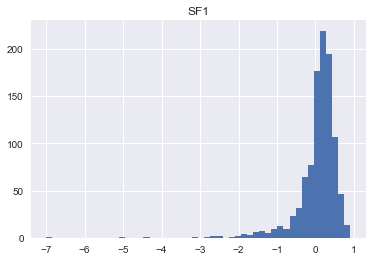

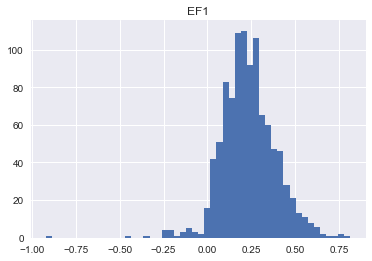

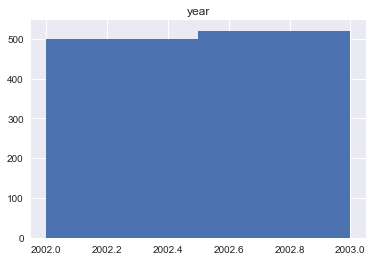

In [8]:
data.hist(column='SF1', bins=50)
data.hist(column='EF1', bins=50)
data.hist(column="year", bins=2)

In [9]:
print(np.sum(data["Bankrupt"][data['year']==2002] == 1))
print(np.sum(data["Bankrupt"][data['year']==2003] == 1))

250
260


## Preprocessing
This is where you should think about encoding qualitative variables, dealing with missing values, etc. Try perturbating the data (add missing values, outliers, and check whether your ML pipeline can cope with it)

In [10]:
data_encoded = data # In this first example, I won't do anything since all variables are numeric, and I'll apply RFs

## Feature extraction
This is where you perform preliminary variable selection, dimensionality reduction, etc. In this starting kit, I'll do nothing and will apply a vanilla random forest classifier. You should implement other classifiers and choose appropriate preprocessing methods. By the way, how do you validate your choices of preprocessing and/or classifiers? You can check out scikit-learn's "pipeline" class.

## Classification: A random forest baseline

We isolate the target column.

In [11]:
features = data_encoded.drop(['Bankrupt'], axis=1)
X_columns = data_encoded.columns.drop(['Bankrupt'])
X = features.values
y = data_encoded['Bankrupt'].values

Scikit-Learn has great wrappers for train-test splitting or cross-validation.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

0.8860296902219194 0.018852324897724017
CPU times: user 103 ms, sys: 33.8 ms, total: 137 ms
Wall time: 244 ms


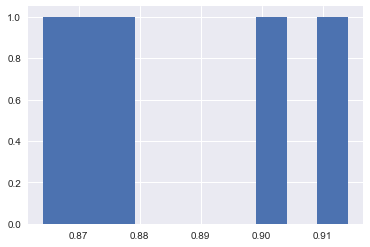

In [13]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

n_estimators = 10
max_depth = 10
max_features = 10
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy',n_jobs=3)
plt.hist(scores)
print(np.mean(scores), np.std(scores))

Now pause and ask yourself this important question: How would you characterize the uncertainty in the cross-validation error? How would you characterize the uncertainty on the test error? Don't hesitate to google, this is one of the most underrated ML topic.

## Variable importances

Let us look at the "importance" of each feature in the RF. Try this several times, what do you observe? Is it consistent with other methods than RF?

In [14]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
len(X_columns)

42

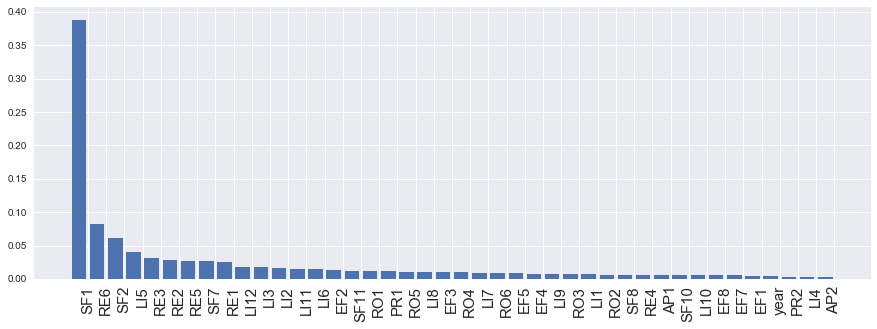

In [16]:
plt.figure(figsize=(15, 5))

ordering = np.argsort(clf.feature_importances_)[::-1][:50]

importances = clf.feature_importances_[ordering]
feature_names = X_columns[ordering]

x = np.arange(len(feature_names))
plt.bar(x, importances)
plt.xticks(x + 0.5, feature_names, rotation=90, fontsize=15);

## Exercises

Some of these questions intersect with questions in text above.

* Get familiar with scikit-learn's 'pipeline' object.
* Try several ML pipelines on different tasks (e.g. train on 2002 data and predict 2003). Compare them properly (hint: confidence intervals on the generalization error!).
* What do you think of the balance between classes in the provided datasets? How would you have proceeded if the datasets had been less balanced? Modify the datasets and try your ideas.
* There is another dataset in `../Data` that gives the same features for another set of companies, but this time the same companies were assessed yearly from 2001 to 2006. So each company corresponds to a multivariate time series. Try and make use of the temporal aspect to predict bankruptcy in the last year: can you beat a vanilla baseline that doesn't care about time?